# Custom Transformer

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import set_config; set_config(display='diagram')

👇 Consider the following dataset

In [2]:
import pandas as pd

data = pd.read_csv("data.csv")
data.head()

,customer_state,seller_state,product_weight_g,product_length_cm,product_height_cm,product_width_cm,days_until_delivery
0,RJ,SP,1825,53,10,40,9
1,RJ,SP,700,65,18,28,9
2,RJ,SP,1825,53,10,40,11
3,RJ,SP,1825,53,10,40,12
4,RJ,SP,1825,53,10,40,14


- Each observation of the dataset represents an item being delivered from a  `seller_state` to a `customer_state`. 
- Other columns describe the packaging properties of each item.

🎯 The target is the number of days between the order and the delivery.

<AxesSubplot:xlabel='days_until_delivery', ylabel='Count'>

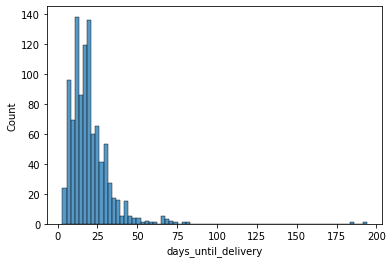

In [3]:
# Check target
sns.histplot(data.days_until_delivery)

## 1. Pipeline

👇 Create a scikit-learn pipeline named `pipe`:

- Engineer a `volume` feature from the dimensions features
- Preserve the original product dimensions features for training
- Scale all numerical features
- Encode the categorical features
- Add a default `Ridge` regression estimator

<details><summary>Hints</summary>

- There are many ways to create your preprocessed matrix (using `ColumnTransformer` and/or `FeatureUnion`). 
    
- If your transformed feature matrix look wierd, it may be stored as "sparse" by the default behavior of `OneHotEncoder(sparse=True)`. Use `.todense()` to turn it back to a dense matrix

</details>

In [15]:
# YOUR CODE HERE
#imports
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder #Encode features as a one-hot numeric array.
from sklearn.compose import ColumnTransformer 
from sklearn.linear_model import Ridge
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_union
from sklearn.compose import make_column_transformer, make_column_selector

In [30]:
# type prepocessing 
num_transformer = make_pipeline(SimpleImputer(),  RobustScaler())
cat_transformer =  OneHotEncoder(handle_unknown='ignore', sparse=False)

# transformer mes colonnes selon les deux méthod num_transformer ou cat_transformer

preproc_basic = make_column_transformer(
(num_transformer, make_column_selector(dtype_include=['int64'])),
(cat_transformer, make_column_selector(dtype_include=['object']))
)

#target : number of days between the order and the delivery
X = data.drop(columns='days_until_delivery')
y = data.days_until_delivery.copy()


volume_transformer = FunctionTransformer(
    lambda df : pd.DataFrame(
        df['product_length_cm']*df['product_height_cm']*df['product_width_cm']
    )
)



#preprocessor = ColumnTransformer([
   # ('', pipe, ['','']),
    #('', cat_transformer, ['', ''])])

In [31]:
preproc_full = make_union(volume_transformer, preproc_basic)
preproc_full

FeatureUnion(transformer_list=[('functiontransformer',
                                FunctionTransformer(func=<function <lambda> at 0x137d9f790>)),
                               ('columntransformer',
                                ColumnTransformer(transformers=[('pipeline',
                                                                 Pipeline(steps=[('simpleimputer',
                                                                                  SimpleImputer()),
                                                                                 ('robustscaler',
                                                                                  RobustScaler())]),
                                                                 <sklearn.compose._column_transformer.make_column_selector object at 0x136f7b490>),
                                                                ('onehotencoder',
                                                                 OneHotEncoder(handle_unknown='ignore',
                                                                               sparse=False),
                                                                 <sklearn.compose._column_transformer.make_column_selector object at 0x136f7b820>)]))])

In [33]:
pd.DataFrame(preproc_full.fit_transform(X))

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,21200.0,-0.660217,0.000000,-1.000000,0.642857,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,32760.0,-0.768520,1.000000,-0.804878,-0.214286,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,21200.0,-0.660217,0.000000,-1.000000,0.642857,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,21200.0,-0.660217,0.000000,-1.000000,0.642857,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,21200.0,-0.660217,0.000000,-1.000000,0.642857,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,87696.0,0.781420,0.833333,0.170732,-0.500000,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
996,25200.0,-0.770927,-1.083333,-0.804878,0.285714,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
997,23625.0,-0.638556,-0.666667,-0.878049,0.285714,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
998,45084.0,0.006450,-0.083333,0.000000,-1.000000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [36]:
pipe = Pipeline([
    ('preproc',preproc_full),
    ('ridge',Ridge())
])
pipe

Pipeline(steps=[('preproc',
                 FeatureUnion(transformer_list=[('functiontransformer',
                                                 FunctionTransformer(func=<function <lambda> at 0x137d9f790>)),
                                                ('columntransformer',
                                                 ColumnTransformer(transformers=[('pipeline',
                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                   SimpleImputer()),
                                                                                                  ('robustscaler',
                                                                                                   RobustScaler())]),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x136f7b490>),
                                                                                 ('onehotencoder',
                                                                                  OneHotEncoder(handle_unknown='ignore',
                                                                                                sparse=False),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x136f7b820>)]))])),
                ('ridge', Ridge())])

#### 🧪 Test your pipe

In [37]:
from nbresult import ChallengeResult

pipe_test = pipe

# Check that it doesn't crash
assert pipe_test.fit(X,y)

result = ChallengeResult('pipe', 
                         shape = pipe_test[:-1].fit_transform(X).shape
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/selmalopez/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/selmalopez/code/selmalopez/data-challenges/05-ML/08-Workflow/02-Custom-Transformer
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_pipe.py::TestPipe::test_pipe_not_crashing PASSED              [100%]

============================== 1 passed in 0.71s ===============================


💯 You can commit your code:

git add tests/pipe.pickle

git commit -m 'Completed pipe step'

git push origin master


## 2. Train and Predict

👇 Let's imagine `data` is your entire training set.

- `cross_validate` your pipeline on this dataset (❗️low r2 score are expected)
- Now, imagine you just received an new order `new_data`: predict it's duration of delivery in a variable `prediction`

In [8]:
new_data = pd.read_csv("data_new.csv")
new_data

,customer_state,seller_state,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,RJ,SP,1825,53,10,40


In [43]:
# YOUR CODE HERE
from sklearn.model_selection import cross_validate
model = pipe
r_score = cross_validate(model,X, y, cv=5)
r_score
r_score['test_score'].mean()

0.12471298419992369

In [47]:
prediction = model.predict(new_data)

In [48]:
from nbresult import ChallengeResult

result = ChallengeResult('prediction',
    prediction = prediction
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/selmalopez/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/selmalopez/code/selmalopez/data-challenges/05-ML/08-Workflow/02-Custom-Transformer
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_prediction.py::TestPrediction::test_prediction PASSED         [100%]

============================== 1 passed in 0.69s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master


🏁 Congratulation. Don't forget to add, commit and push your notebook.